### 2.2.4(素朴な)確率分布
センサのデータリスト$\boldsymbol{z}_{LiDAR} = \{z_i | i = 0, 1, 2,...,N-1\}$からN回目以降のセンサ値$z_N,z_{N+1}$がどうなるか予測する

まずはある値がN回中何回出たかで確率を求める

In [1]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt", delimiter=" ", header = None, names = ("data", "time", "ir", "lidar"))
data

,data,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [9]:
freqs = pd.DataFrame(data["lidar"].value_counts()) #センサ値の頻度をカウントする
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [12]:
#頻度をデータ全体の個数で割って確率とする
freqs["probs"] = freqs["lidar"] / len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [16]:
#確率の和は1になる
sum(freqs["probs"])

1.0

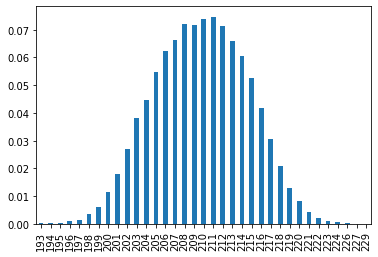

In [18]:
import matplotlib.pyplot as plt
freqs["probs"].sort_index().plot.bar() #freqsというデータフレームはセンサ値をインデックスにしてそれぞれの頻度と確率を格納している
plt.show()

個別の確率$P(z)$を与える関数$P$を確率質量関数と呼ぶ

確率質量関数は離散的な変数に対して定義される。連続的な変数の場合は確率密度関数となる

変数に対して確率がどのように分布するかを表す実体$P$とも考えることができその場合確率分布と呼ぶ

### 2.2.5 確率分布を用いたシミュレーション
pandasメソッドを使って確率分布からN番目の値$z_N$を選ぶ

In [19]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0] 
#n=1で一個のサンプルを選ぶ、weightsで確率の重み付け、index[0]でインデックスのセンサ値を引っ張る
drawing()

212

このような処理をドローといい、数式で以下のように表現する
$$
z_N \sim P_{\boldsymbol{z}_{LiDAR}}
$$

母集団から個々のものを抽出することをドローといい、集団の一部を抽出することをサンプリングと呼んで区別する

In [20]:
samples = [drawing() for i in range (100)] #100回drwaing()を回した値のリストを作る
simulated = pd.DataFrame(samples, columns=["lidar"]) #列名lidarでデータフレーム型にする
simulated
#p = simulated["lidar"]
#p.hist(bins = max(p) - min(p), color = "orange", align="left")
#plt.show()

,lidar
0,206
1,215
2,215
3,219
4,207
...,...
95,216
96,203
97,217
98,214


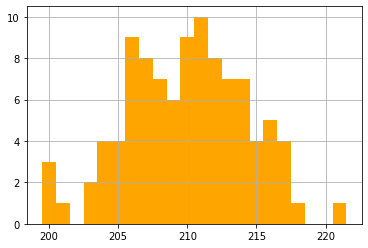

In [21]:
samples = [drawing() for i in range (100)]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p), color = "orange", align="left") #.histはリスト型には使えないのでデータフレーム型にしている
plt.show()

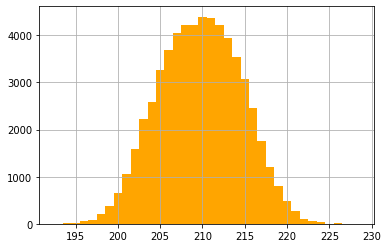

In [27]:
samples = [drawing() for i in range (len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
#.histはリスト型には使えないのでデータフレーム型にしている
p.hist(bins = max(p) - min(p), color = "orange", align="left")
plt.show()

## 章末問題2.1
LiDARのデータから作ったガウス分布からn個の値を抽出する

In [28]:
def sampling_n(n):
    samples = [drawing() for i in range (n)]
    return samples
sampling_n(3)

[208, 209, 201]

#### a. n =3で標本抽出し標本分散を求める

In [29]:
simulated = pd.DataFrame(sampling_n(3), columns=["lidar"])
p = simulated["lidar"]
#pandas
pandas_sampling_var = p.var(ddof = False) #標本分散
print(sampling_n(3))
print(pandas_sampling_var)

[209, 204, 209]
16.222222222222218


#### b. a.を10000回繰り返し、標本分散の平均値を求める

In [30]:
def sampling_var_n(n):
    simulated = pd.DataFrame(sampling_n(n), columns=["lidar"])
    p = simulated["lidar"]
    pandas_sampling_var = p.var(ddof = False) #標本分散
    return pandas_sampling_var
    

samples = [sampling_var_n(3) for i in range (10000)]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
mean = p.mean()
print(mean)

15.299066666666759


#### c. n=3で標本抽出し不偏分散を求める

In [31]:
def unbiased_var_n(n):
    simulated = pd.DataFrame(sampling_n(n), columns=["lidar"])
    p = simulated["lidar"]
    pandas_unbiased_var = p.var() #不偏分散
    return pandas_unbiased_var

print(sampling_n(3))
print(unbiased_var_n(3))


[199, 214, 210]
41.33333333333333


#### d. c.を10000回繰り返し、不偏分散の平均値を求める

In [32]:
samples = [unbiased_var_n(3) for i in range (10000)]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
mean = p.mean()
print(mean)

23.711033333335564


求めた標本分散と不偏分散の平均値を比較すると不偏分散のほうが大きい。

n=3の場合はサンプル数が少ないため標本分散では分散が小さくなってしまうが、不偏分散で補正されたと考えられる。

#### n=1000の場合

In [35]:
def sampling_var_n(n):
    simulated = pd.DataFrame(sampling_n(n), columns=["lidar"])
    p = simulated["lidar"]
    pandas_sampling_var = p.var(ddof = False) #標本分散
    return pandas_sampling_var

def unbiased_var_n(n):
    simulated = pd.DataFrame(sampling_n(n), columns=["lidar"])
    p = simulated["lidar"]
    pandas_unbiased_var = p.var() #不偏分散
    return pandas_unbiased_var

samples1 = [sampling_var_n(1000) for i in range (10)]
simulated = pd.DataFrame(samples1, columns=["lidar"])
p = simulated["lidar"]
mean1 = p.mean()
print(mean1)



samples2 = [unbiased_var_n(1000) for i in range (10)]
simulated = pd.DataFrame(samples2, columns=["lidar"])
p = simulated["lidar"]
mean2 = p.mean()
print(mean2)

23.2858712
23.23470640640641
